# MNIST autoencoder from nnBuilder

A basic convolutional autoencoder for MNIST

In [1]:
import numpy as np
import tensorflow as tf
import sys, os, seaborn, time
import matplotlib.pyplot as plt
sys.path.append('../nnBuilder')
from nnLayer import *
from nnInput import *
from nnTrainer import *
from nnHandler import *
from nnAuto import *

In [2]:
data=Layer(type="MNIST",batch=128)
data_test=Layer(type="MNIST",test=True)
'''encoder=[]
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=2,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
encoder.append(dict(type="Convolution",pad="SAME",window=5,stride=1,size=4,relu=True))
encoder.append(dict(type="Pool",pad="SAME",window=2,stride=2,pool_type="max"))
decoder=[]
decoder.append(dict(type="Relu",size=49*4))
decoder.append(dict(type="Reshape",shape=[-1,7,7,4]))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=2,relu=True))
decoder.append(dict(type="Convolution_Transpose",pad="SAME",window=5,stride=2,size=1,relu=False))'''
#decoder.append(dict(type="Sigmoid_Feature"))
encoder=[]
encoder.append(dict(type="Relu",size=512))
encoder.append(dict(type="Relu",size=256))
encoder=dict(type="Normal_Learned",layers=encoder,mean=dict(type="Linear",size=2))
decoder=[]
decoder.append(dict(type="Relu",size=256))
decoder.append(dict(type="Relu",size=512))
decoder.append(dict(type="Linear",size=784))
decoder.append(dict(type="Reshape",shape=[-1,28,28,1]))
decoder=dict(type="Binary_Learned",layers=decoder)



autoencoder=Layer(x=data,type="Autoencoder",encoder=encoder,decoder=decoder,variational=True)
autoencoder_eval=autoencoder.copy(x=data,test=True)
autoencoder_test=autoencoder.copy(x=data_test,test=True)

trainer=LabeledTrainer(network=autoencoder,optimizer="adam",loss="network")
tester_eval=LabeledTrainer(network=autoencoder_eval,loss="network",test=True)
tester=LabeledTrainer(network=autoencoder_test,loss="network",test=True)

#trainer_start=LabeledTrainer(network=autoencoder,optimizer="adam",loss="mean_squared_error")

sess=SessManager()

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


789.882
789.72


<IPython.core.display.Javascript object>


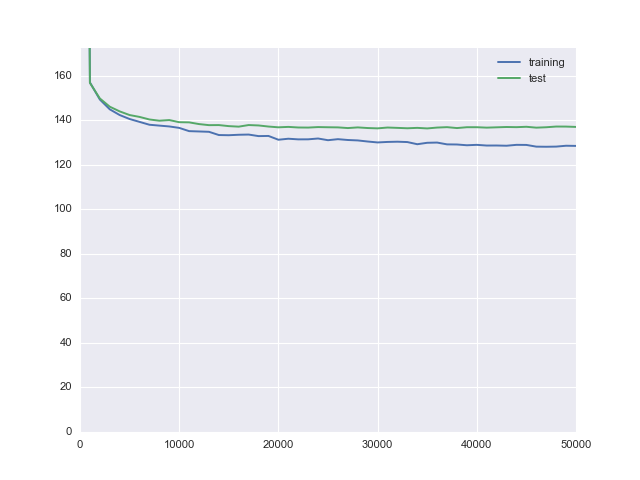

157.077
156.859


149.404
149.876


144.992
146.173


142.422
144.062


140.638
142.42


139.351
141.58


138.061
140.43


137.675
139.873


137.294
140.168


136.649
139.208


135.19
139.133


135.043
138.359


134.89
137.879


133.436
137.911


133.355
137.442


133.562
137.208


133.652
137.924


132.957
137.744


133.029
137.252


131.326
136.908


131.777
137.094


131.492
136.83


131.512
136.789


131.877
137.012


131.115
136.932


131.58
136.875


131.207
136.569


131.015
136.864


130.524
136.584


130.11
136.438


130.338
136.808


130.437
136.653


130.283
136.478


129.307
136.659


129.954
136.41


130.055
136.792


129.243
136.978


129.187
136.571


128.845
136.95


129.028
136.951


128.716
136.763


128.733
136.906


128.63
137.048


129.032
136.973


128.993
137.145


128.223
136.756


128.17
136.936


128.24
137.253


128.626
137.236


128.554
137.082


In [3]:
batches_per_step=1000#60000//128 #About 1 epoch
batches_per_eval=100
n_steps=50
#trainer_start.train(1000,learn_rate=1e-3)
def make_plt():
    %matplotlib notebook
    global fig,ax,train_plot,test_plot#,eval_plot
    fig,ax = plt.subplots(1,1)
    train_plot=ax.plot([],[], label="training")[0]
    #eval_plot=ax.plot([],[], label="eval")[0]
    test_plot=ax.plot([],[], label="test")[0]
    ax.set_ylim(0,1)
    plt.legend()
    fig.canvas.draw()
    time.sleep(.01)
def update_plt():
    x=[batches_per_step*i for i in range(len(trains))]
    train_plot.set_xdata(x)
    train_plot.set_ydata(trains)
    test_plot.set_xdata(x)
    test_plot.set_ydata(tests)
    #eval_plot.set_xdata(x)
    #eval_plot.set_ydata(evals)
    ax.set_xlim(0,x[-1])
    ax.set_ylim(0,tests[1]*1.1)
    fig.canvas.draw()
    #time.sleep(.01)
if "trains" not in globals():
    trains=[trainer.eval_loss(n=batches_per_eval)]
    #evals=[trainer_eval.eval_loss(n=batches_per_eval)]
    tests=[tester.eval_loss()]
make_plt()
for i in range(n_steps):
    trainer.train(batches_per_step,learn_rate=1e-3)
    trains.append(trainer.eval_loss(n=batches_per_eval)) 
    #evals.append(trainer_eval.eval_loss(n=batches_per_eval)) 
    tests.append(tester.eval_loss())
    show(-sess.run(autoencoder.decoder)[0,:,:,0])
    show(-autoencoder.generate()[0,:,:,0])
    update_plt()

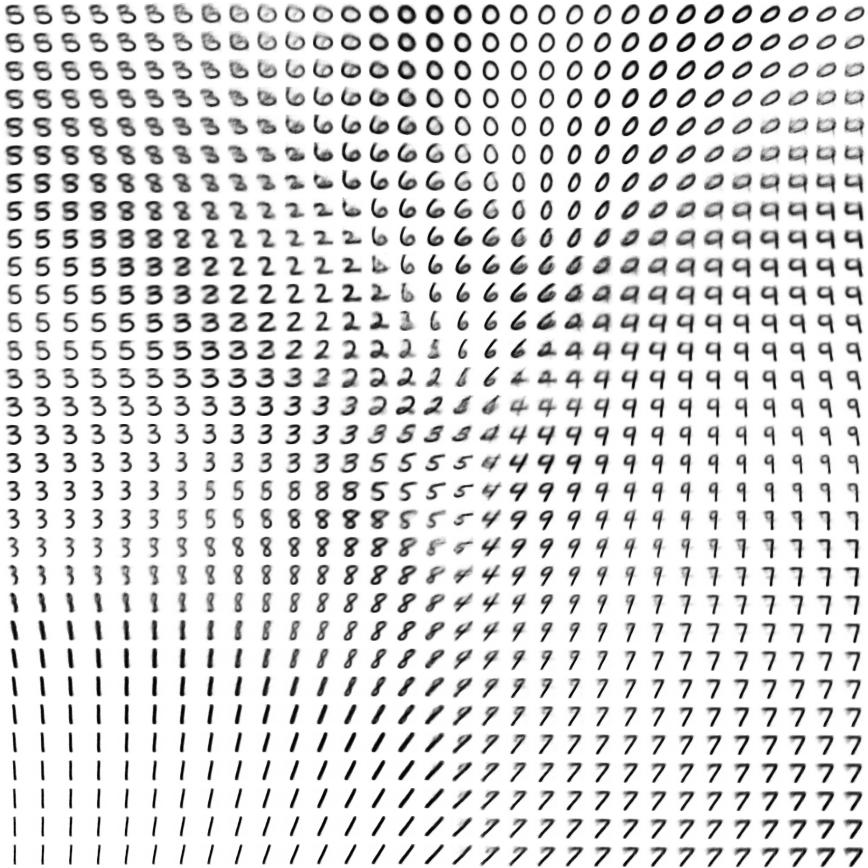

In [4]:
p=15
step=0.1
x=[[step*n,step*m] for n in range(-p,p+1) for m in range(-p,p+1)]
y=autoencoder.decode(x).reshape(2*p+1,2*p+1,28,28)
show(-composite(y))

In [5]:
sess.run(autoencoder.loss_kl())

AttributeError: 'Autoencoder' object has no attribute 'loss_kl'

In [ ]:
sess.run(autoencoder.loss_reconstruction())

In [ ]:
sess.run(autoencoder.norm_x)

In [ ]:
sess.run(autoencoder.log_det)

In [ ]:
sess.run(tf.reduce_mean(autoencoder.loss_reconstruction(reduce=False)))

In [ ]:
sess.run(autoencoder.zd.mean)

In [ ]:
sess.run(autoencoder.ze.log_std)

In [ ]:
show(sess.run(autoencoder.zd)[0,:,:,0])